<a href="https://colab.research.google.com/github/Tiroamodimo/regression-predict-api-template/blob/master/Predict_Regression_LM_v03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

#### Context
**Economies are better when logistics is efficient and affordable**

Sendy, in partnership with insight2impact facility, is hosting a Zindi challenge to predict the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at final destination. 
Sendy helps men and women behind every type of business to trade easily, deliver more competitively, and build extraordinary businesses.

#### Why Solve this problem?
The solution will help Sendy enhance customer communication and improve the reliability of its service; which will ultimately improve customer experience. In addition, the solution will enable Sendy to realise cost savings, and ultimately reduce the cost of doing business, through improved resource management and planning for order scheduling.

An accurate arrival time prediction will help all businesses to improve their logistics and communicate an accurate time to their customers. 

#### What will be done?
Given the details of a Sendy order, historic data will be used to predict the time of arrival of a rider at the destination of a package as accurately as possible.

#### How will this be done

By building a linear regression model that predicts an accurate delivery time, from picking up a package to arriving at the final destination.


# 1. Data Pre-Processing

## 1.1 Load Libraries

In [0]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Figures inline and set visualization style
%matplotlib inline
sns.set()

## 1.2 Check Datasets

In [0]:
# List all files in a directory using os.listdir
basepath = 'Zindi Data/'
for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        print(entry)

Test.csv
SampleSubmission.csv
Train.csv
Riders.csv
VariableDefinitions.csv


#### Check that all datasets are accounted for

The files for download according to the hackathon:

* `Train.csv` - is the dataset that you will use to train your model
* `Test.csv` - is the dataset on which you will apply your model to.
* `Riders.csv` - contains unique rider Ids, number of orders, age, rating and number of ratings
* `VariableDefinitions.csv` - Definitions of variables in the Train, Test and Riders files

The above files are accounted for.

An additional file, `SampleSubmission.csv` was available for download as well


## 1.3 Import the datasets

In [0]:
# import Datasets
data_folder = 'Zindi Data/'

train_df = pd.read_csv(data_folder + 'Train.csv')
test_df = pd.read_csv(data_folder + 'Test.csv')
riders_df = pd.read_csv(data_folder + 'Riders.csv')
variable_definitions_df = pd.read_csv(data_folder + 'VariableDefinitions.csv', header=None,
                                      names=['Variable', 'Definition'])
sample_submission_df = pd.read_csv(data_folder + 'SampleSubmission.csv')

In [0]:
# check training data
train_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [0]:
# check test data
test_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [0]:
# check riders
riders_df.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [0]:
# Check variable definitions
variable_definitions_df.head()

,Variable,Definition
0,Order No,Unique number identifying the order
1,User Id,Unique number identifying the customer on a pl...
2,Vehicle Type,"For this competition limited to bikes, however..."
3,Platform Type,"Platform used to place the order, there are 4 ..."
4,Personal or Business,Customer type


In [0]:
# check sample submission
sample_submission_df.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,567.0
1,Order_No_12736,4903.0
2,Order_No_768,5649.0
3,Order_No_15332,NaN
4,Order_No_21373,NaN


#### Prelimenary observation
Based on DataFrame previews it can be assumed that of all data were successfully imported. the following data will form part of the regression analysis:
* `train_df`
* `test_df`
* `riders_df`

`variable_definitions_df` privides definitions of the variables

`sample_submission_df` is a template for the submission of model predictions for this project

## 1.4 Assess Data

### 1.4.1 Assess variable definitions

In [0]:
merged_train_rider = pd.merge(train_df, riders_df, on='Rider Id')
merged_test_rider = pd.merge(test_df, riders_df, on='Rider Id')

In [0]:
merged_train_rider_cols = pd.DataFrame(merged_train_rider.dtypes, columns=['Dtype'])
merged_train_rider_cols.index = merged_train_rider_cols.index.rename(name='Variable')
Variables_Table = pd.merge(variable_definitions_df, merged_train_rider_cols, on='Variable')
Variables_Table.head()

,Variable,Definition,Dtype
0,Order No,Unique number identifying the order,object
1,User Id,Unique number identifying the customer on a pl...,object
2,Vehicle Type,"For this competition limited to bikes, however...",object
3,Platform Type,"Platform used to place the order, there are 4 ...",int64
4,Personal or Business,Customer type,object


In [0]:
# Get variable definitions
print(f'Number of variables: {len(Variables_Table)}\n',
     '======================================= \n')
for var, definition, datatype in Variables_Table.values:
    print(f'{var}\ndata type:{datatype}\nDef:{definition}\n')

Number of variables: 34

Order No
data type:object
Def:Unique number identifying the order

User Id
data type:object
Def:Unique number identifying the customer on a platform

Vehicle Type
data type:object
Def:For this competition limited to bikes, however in practice Sendy service extends to trucks and vans

Platform Type
data type:int64
Def:Platform used to place the order, there are 4 types

Personal or Business
data type:object
Def:Customer type

Placement - Day of Month
data type:int64
Def:Placement - Day of Month i.e 1-31

Placement - Weekday (Mo = 1)
data type:int64
Def:Placement - Weekday (Monday = 1)

Placement - Time
data type:object
Def:Placement - Time - Time of day the order was placed

Confirmation - Day of Month
data type:int64
Def:Confirmation - Day of Month i.e 1-31

Confirmation - Weekday (Mo = 1)
data type:int64
Def:Confirmation - Weekday (Monday = 1)

Confirmation - Time
data type:object
Def:Confirmation - Time - Time of day the order was confirmed by a rider

Arriva

#### Conclusion from Definitions
* Per definition, the platform type should be non-numerical
* Per definition, All Days should be non-numerical
    * Weekday
    * Day of Month

### 1.4.2 Change Variable Types

In [0]:
# create copy of dataframes to change variable types
merged_train_rider_dtype = merged_train_rider.copy()
merged_test_rider_dtype = merged_test_rider.copy()

In [0]:
# list of variables to make non-numeric
non_num_list_train = ['Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
                'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
                'Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)',
                'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)',
                'Arrival at Destination - Day of Month',
                'Arrival at Destination - Weekday (Mo = 1)', 'Platform Type']

non_num_list_test = ['Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
                'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
                'Arrival at Pickup - Weekday (Mo = 1)',
                'Pickup - Weekday (Mo = 1)', 'Platform Type']


In [0]:
for col in non_num_list_train:
    merged_train_rider_dtype[col] = merged_train_rider_dtype[col].astype('object')

In [0]:
for col in non_num_list_test:
    merged_test_rider_dtype[col] = merged_test_rider_dtype[col].astype('object')

In [0]:
merged_train_rider_cols2 = pd.DataFrame(merged_train_rider_dtype.dtypes, columns=['Dtype'])
merged_train_rider_cols2.index = merged_train_rider_cols2.index.rename(name='Variable')
Variables_Table2 = pd.merge(variable_definitions_df, merged_train_rider_cols2, on='Variable')
Variables_Table2.head()

,Variable,Definition,Dtype
0,Order No,Unique number identifying the order,object
1,User Id,Unique number identifying the customer on a pl...,object
2,Vehicle Type,"For this competition limited to bikes, however...",object
3,Platform Type,"Platform used to place the order, there are 4 ...",object
4,Personal or Business,Customer type,object


In [0]:
# Get variable datatypes
print(f'Number of variables: {len(Variables_Table2)}\n',
     '======================================= \n')
for var, definition, datatype in Variables_Table2.values:
    print(f'{var}\ndata type:{datatype}\nDef:{definition}\n')

Number of variables: 34

Order No
data type:object
Def:Unique number identifying the order

User Id
data type:object
Def:Unique number identifying the customer on a platform

Vehicle Type
data type:object
Def:For this competition limited to bikes, however in practice Sendy service extends to trucks and vans

Platform Type
data type:object
Def:Platform used to place the order, there are 4 types

Personal or Business
data type:object
Def:Customer type

Placement - Day of Month
data type:object
Def:Placement - Day of Month i.e 1-31

Placement - Weekday (Mo = 1)
data type:object
Def:Placement - Weekday (Monday = 1)

Placement - Time
data type:object
Def:Placement - Time - Time of day the order was placed

Confirmation - Day of Month
data type:object
Def:Confirmation - Day of Month i.e 1-31

Confirmation - Weekday (Mo = 1)
data type:object
Def:Confirmation - Weekday (Monday = 1)

Confirmation - Time
data type:object
Def:Confirmation - Time - Time of day the order was confirmed by a rider

A

### 1.4.3 Assess Missing Data

In [0]:
# define function to calculate missing values
def missing_values_table(df):
    """
    This function takes a dataframe as input and returns a dataframe
    of the number and percentage of missing values as and output.
    """
    mis_val = df.isnull().sum()

    mis_val_percent = 100 * df.isnull().sum() / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [0]:
# Assess Train dataset dimensions, variables and datatypes
merged_train_rider_dtype.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  object 
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  object 
 6   Placement - Weekday (Mo = 1)               21201 non-null  object 
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  object 
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  object 
 10  Confirmation - Time   

In [0]:
# Assess Train dataset missing values
missing_values_table(merged_train_rider_dtype)

Your selected dataframe has 33 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Precipitation in millimeters,20649,97.4
Temperature,4366,20.6


In [0]:
# Assess Test dataset dimensions, variables and datatypes
merged_test_rider_dtype.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7068 entries, 0 to 7067
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   object 
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   object 
 6   Placement - Weekday (Mo = 1)          7068 non-null   object 
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   object 
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   object 
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

In [0]:
# Assess Test dataset missing values
missing_values_table(merged_test_rider_dtype)

Your selected dataframe has 29 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Precipitation in millimeters,6869,97.2
Temperature,1437,20.3


### 1.4.4 EDA

In [0]:
# list of numeric data types
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_features = merged_train_rider_dtype.select_dtypes(include=numerics).columns
print(f'Numeric features: {len(numeric_features)} features\n{numeric_features}')

# list of columns for non-numeric features
non_numeric_features = merged_train_rider_dtype.select_dtypes(include='object').columns
print(f'Non-numeric features: {len(non_numeric_features)} features\n{non_numeric_features}')

Numeric features: 12 features
Index(['Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Time from Pickup to Arrival', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings'],
      dtype='object')
Non-numeric features: 21 features
Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Rider Id'],
      dtype='object')


count    21201.000000
mean      1556.920947
std        987.270788
min          1.000000
25%        882.000000
50%       1369.000000
75%       2040.000000
max       7883.000000
Name: Time from Pickup to Arrival, dtype: float64
Skewness: 1.201938
Kurtosis: 2.236352


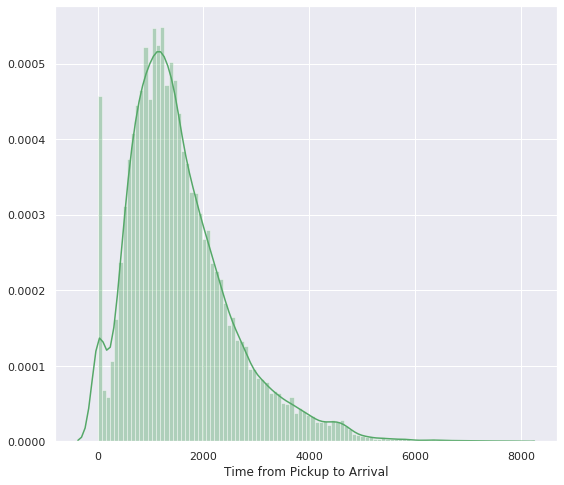

In [0]:
# Assess response variable
print(merged_train_rider_dtype['Time from Pickup to Arrival'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(merged_train_rider_dtype['Time from Pickup to Arrival'], color='g', bins=100, hist_kws={'alpha': 0.4});
#skewness and kurtosis
print("Skewness: %f" % merged_train_rider_dtype['Time from Pickup to Arrival'].skew())
print("Kurtosis: %f" % merged_train_rider_dtype['Time from Pickup to Arrival'].kurt())

#### Obervations
* Exponential distribution
* Large Number of 0 second Time from pickup to arrival

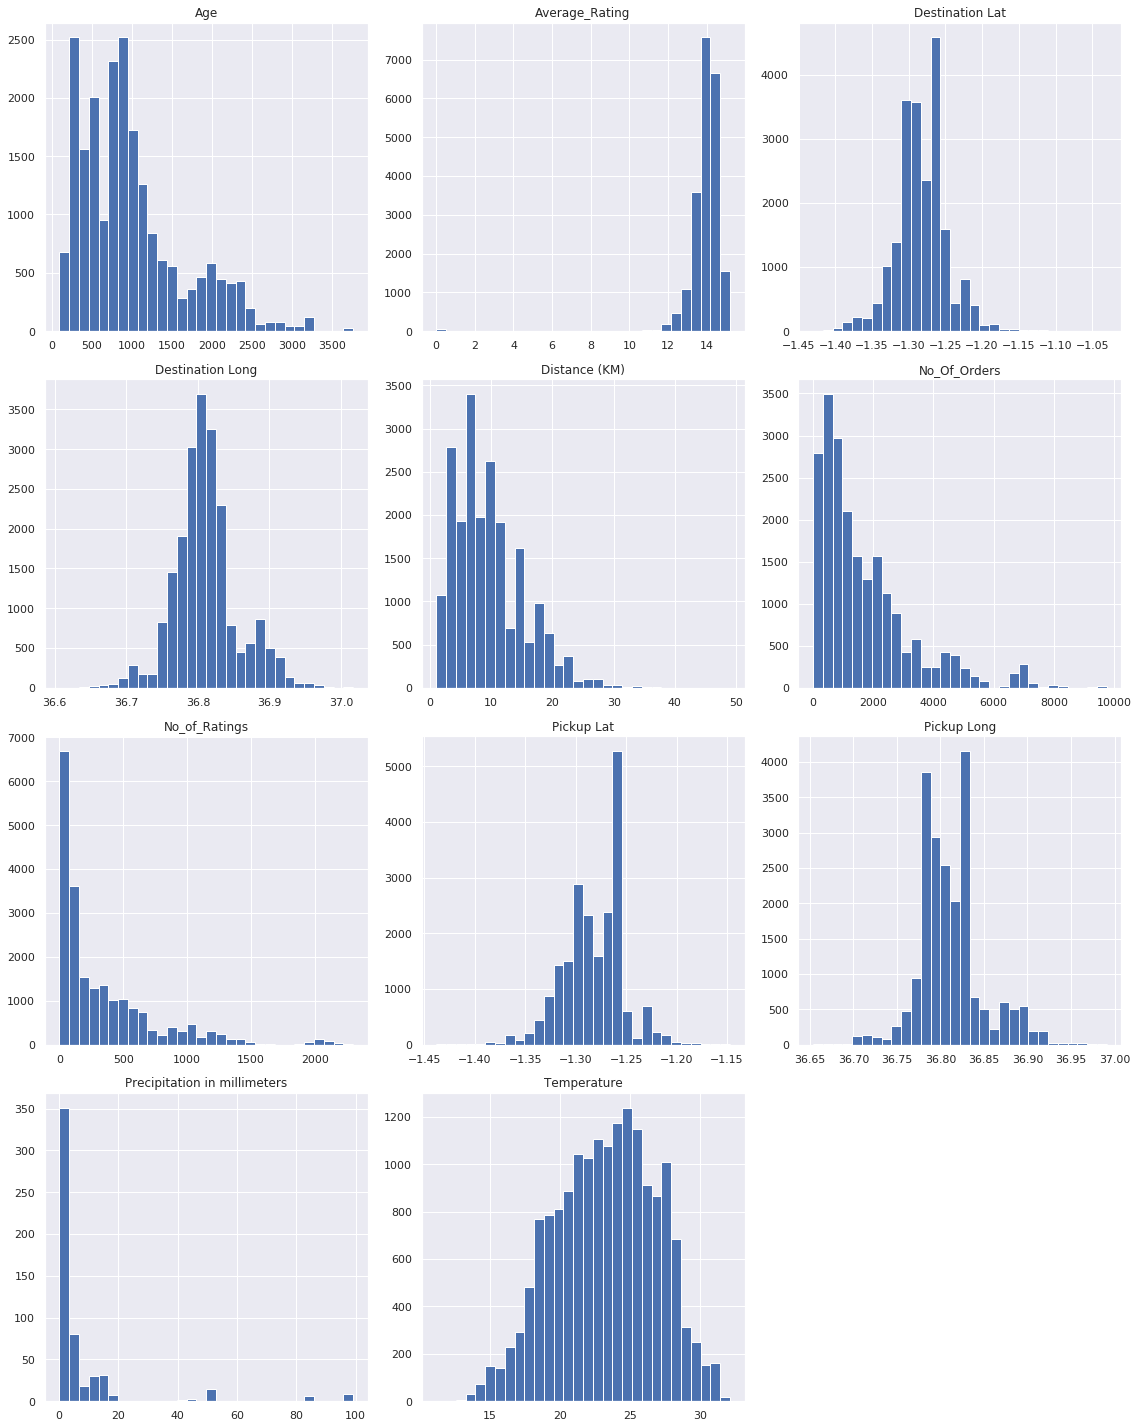

In [0]:
# Assess numercal predictor variables
merged_train_rider_dtype.drop(['Time from Pickup to Arrival'], axis=1).hist(
    figsize=(16, 20),bins=30)
plt.tight_layout()
plt.show()

In [0]:
# Create correlation matrix
corr = merged_train_rider_dtype.drop('Time from Pickup to Arrival', axis=1).corr()

In [0]:
# import function to plot correlation matrix
from statsmodels.graphics.correlation import plot_corr

<Figure size 720x504 with 0 Axes>

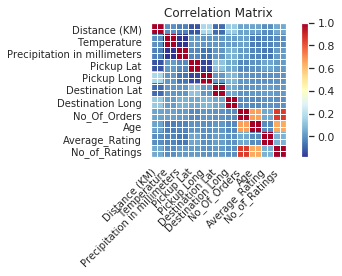

In [0]:
plt.figure(figsize=(10,7))
fig=plot_corr(corr,xnames=corr.columns)
plt.show()

#### Observations
highly correlated variables:
* Number of orders
* Age
* No of Ratings


In [0]:
# Calculate correlations between predictor variables and the response variable
corrs = merged_train_rider_dtype.corr()['Time from Pickup to Arrival'].sort_values(ascending=False)
print(f'correlations with {merged_train_rider_dtype.columns[-1]}:\n{corrs}')

correlations with No_of_Ratings:
Time from Pickup to Arrival     1.000000
Distance (KM)                   0.580608
Destination Long                0.070425
Pickup Long                     0.060285
Precipitation in millimeters    0.024756
Temperature                     0.006465
No_of_Ratings                   0.005609
Age                            -0.007969
No_Of_Orders                   -0.041608
Average_Rating                 -0.042559
Pickup Lat                     -0.053823
Destination Lat                -0.061872
Name: Time from Pickup to Arrival, dtype: float64


In [0]:
# plot_var1 = 'Placement - Weekday (Mo = 1)'
# plot_var2 = 'Order No'
# plot_var3 = 'User Id'
# plot_var4 = 'Vehicle Type'

# fig, axs = plt.subplots(2, 2)
# axs[0, 0].hist(merged_train_rider_dtype[plot_var1])
# axs[0, 0].set_title(f'{plot_var1}')
# axs[0, 1].hist(merged_train_rider_dtype[plot_var2])
# axs[0, 1].set_title(f'{plot_var2}')
# axs[1, 0].hist(merged_train_rider_dtype[plot_var3])
# axs[1, 0].set_title(f'{plot_var3}')
# axs[1, 1].hist(merged_train_rider_dtype[plot_var4])
# axs[1, 1].set_title(f'{plot_var4}')

# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

In [0]:
['Order No', 'User Id']

['Order No', 'User Id']

In [0]:
# 1
plot_var = 'Order No'
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

Order_No_17085    0.000047
Order_No_3966     0.000047
Order_No_19554    0.000047
Order_No_19660    0.000047
Order_No_6630     0.000047
                    ...   
Order_No_11797    0.000047
Order_No_10857    0.000047
Order_No_2763     0.000047
Order_No_9948     0.000047
Order_No_10547    0.000047
Name: Order No, Length: 21201, dtype: float64

In [0]:
#2
plot_var = 'User Id'
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

User_Id_393     0.030423
User_Id_2330    0.015188
User_Id_3647    0.014716
User_Id_1500    0.014197
User_Id_635     0.013679
                  ...   
User_Id_1916    0.000047
User_Id_725     0.000047
User_Id_2445    0.000047
User_Id_1945    0.000047
User_Id_2889    0.000047
Name: User Id, Length: 3186, dtype: float64

In [0]:
['Vehicle Type', 'Platform Type']
       

['Vehicle Type', 'Platform Type']

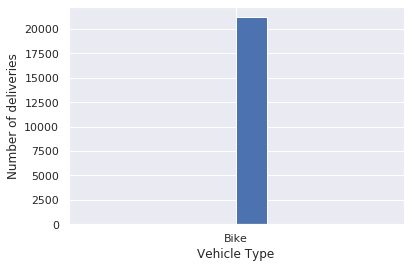

Bike    1.0
Name: Vehicle Type, dtype: float64

In [0]:
#3
plot_var = 'Vehicle Type'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

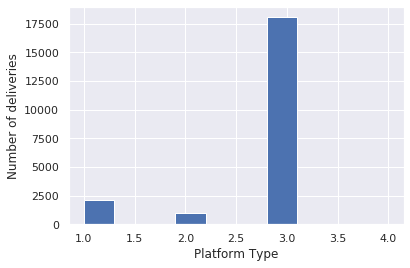

3    0.851564
1    0.101269
2    0.046224
4    0.000943
Name: Platform Type, dtype: float64

In [0]:
# 4
plot_var = 'Platform Type'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

In [0]:
['Personal or Business', 'Placement - Day of Month']

['Personal or Business', 'Placement - Day of Month']

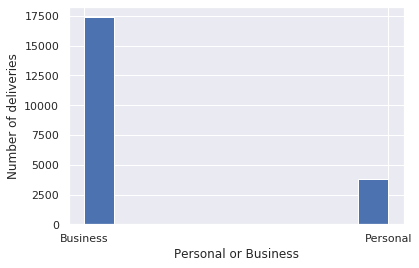

Business    0.819961
Personal    0.180039
Name: Personal or Business, dtype: float64

In [0]:
# 5
plot_var = 'Personal or Business'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

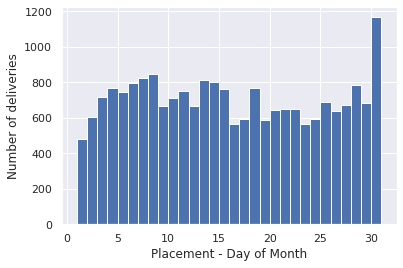

8     0.039998
7     0.038772
13    0.038253
14    0.037923
6     0.037451
28    0.036979
18    0.036272
4     0.036272
15    0.035942
11    0.035470
5     0.035234
3     0.033866
30    0.033678
10    0.033442
25    0.032593
29    0.032310
27    0.031602
9     0.031461
12    0.031414
22    0.030659
21    0.030612
20    0.030329
26    0.030140
2     0.028395
17    0.027970
24    0.027876
19    0.027782
16    0.026650
23    0.026555
1     0.022735
31    0.021367
Name: Placement - Day of Month, dtype: float64

In [0]:
# 6
plot_var = 'Placement - Day of Month'
plt.hist(merged_train_rider_dtype[plot_var], bins=30)
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

In [0]:
['Placement - Weekday (Mo = 1)', 'Placement - Time']



['Placement - Weekday (Mo = 1)', 'Placement - Time']

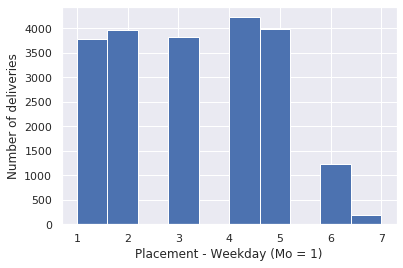

4    0.199425
5    0.188340
2    0.186736
3    0.180322
1    0.178718
6    0.057686
7    0.008773
Name: Placement - Weekday (Mo = 1), dtype: float64

In [0]:
# 7
plot_var = 'Placement - Weekday (Mo = 1)'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

In [0]:
# 8
plot_var = 'Placement - Time'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

In [0]:
['Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)']



In [0]:
# 9
plot_var = 'Confirmation - Day of Month'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

In [0]:
# 10
plot_var = 'Confirmation - Weekday (Mo = 1)'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

In [0]:
['Confirmation - Time', 'Arrival at Pickup - Day of Month']



In [0]:
# 11
plot_var = 'Confirmation - Time'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

In [0]:
# 12
plot_var = 'Arrival at Pickup - Day of Month'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

In [0]:
['Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time']

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Rider Id']

In [0]:
# 13
plot_var = 'Arrival at Pickup - Weekday (Mo = 1)'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

In [0]:
# 14
plot_var = 'Arrival at Pickup - Time'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

In [0]:
['Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time']

In [0]:
# 15
plot_var = 'Pickup - Day of Month'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

In [0]:
# 16
plot_var = 'Pickup - Weekday (Mo = 1)'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

In [0]:
# 17
plot_var = 'Pickup - Time'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

In [0]:
['Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Rider Id']

In [0]:
# 18
plot_var = 'Arrival at Destination - Day of Month'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

In [0]:
# 19
plot_var = 'Arrival at Destination - Weekday (Mo = 1)'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

In [0]:
# 20
plot_var = 'Arrival at Destination - Time', 
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

In [0]:
# 21
plot_var = 'Rider Id'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

In [0]:
# #initialise sub-plot
# fig, axs = plt.subplots(2,3, figsize=(10,6),) # define sub-plot dimensions
# # fig.subplots_adjust(hspace = 0.5, wspace=.2) # adjust space
# axs = axs.ravel() #flatten sub-plote axes array

# for index, column in enumerate(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
#        'Personal or Business', 'Placement - Day of Month']):
#     # set title
#     axs[index].set_title(f'{format(column)}',fontsize=16)
    
#     # set axis labels
#     axs[index].set_xlabel(f'{column}')
    
#     # plot Histogram
#     axs[index].hist(merged_train_rider_dtype[column])
    
# #     if index in [1, 6, 11, 16, 21]:
# #         axs[index].set_ylabel(f'Number of deliveries')
    
# fig.tight_layout(pad=1)
# plt.show()

In [0]:
# Create correlation matrix
corr = merged_train_rider_dtype.drop(['Time from Pickup to Arrival'], axis=1).corr()

In [0]:
# import function to plot correlation matrix
from statsmodels.graphics.correlation import plot_corr